In [106]:
import numpy as np
import matplotlib.pyplot as plt
grid = np.zeros((20, 20, 3))

In [15]:
ratCoords = {'x': 0.1, 'y': 0.1}

In [16]:
print(ratCoords)

{'x': 0.1, 'y': 0.1}


In [60]:
direction = np.random.random_integers(8)
print(direction)

3


In [69]:
minCoords = {'x': 0, 'y': 0}
maxCoords = {'x': 1, 'y': 1}

def detectCollision(coords):
    return coords['x'] < minCoords['x'] or coords['y'] < minCoords['y'] or coords['x'] > maxCoords['x'] or coords['y'] > maxCoords['y']

print(detectCollision({'x': -0.1, 'y': 0.2}))
print(detectCollision({'x': 0.1, 'y': -0.2}))
print(detectCollision({'x': 1.1, 'y': 0.2}))
print(detectCollision({'x': 0.1, 'y': 1.2}))
print(detectCollision({'x': 0.1, 'y': 0.2}))
print(detectCollision({'x': -0.1, 'y': -0.2}))
print(detectCollision({'x': -1.1, 'y': 1.2}))

True
True
True
True
False
True
True


In [159]:
l = 0.03
diagonalDelta = math.sqrt(l**2/2)
print('diagonal travel distance: ', diagonalDelta)
positionDeltas = np.array([[0, -l], [diagonalDelta, -diagonalDelta], [l, 0], [diagonalDelta, diagonalDelta], [0, l], [-diagonalDelta, diagonalDelta], [-l, 0], [-diagonalDelta, -diagonalDelta]])
print('travel vectors by direction: ', positionDeltas)
def updatePosition(currentCoords, direction):
    return currentCoords + positionDeltas[direction-1]

diagonal travel distance:  0.021213203435596427
travel vectors by direction:  [[ 0.        -0.03     ]
 [ 0.0212132 -0.0212132]
 [ 0.03       0.       ]
 [ 0.0212132  0.0212132]
 [ 0.         0.03     ]
 [-0.0212132  0.0212132]
 [-0.03       0.       ]
 [-0.0212132 -0.0212132]]


[[0.0787868 0.0787868]
 [0.1       0.07     ]
 [0.1212132 0.0787868]
 [0.13      0.1      ]
 [0.1212132 0.1212132]
 [0.1       0.13     ]
 [0.0787868 0.1212132]
 [0.07      0.1      ]
 [0.0787868 0.0787868]]


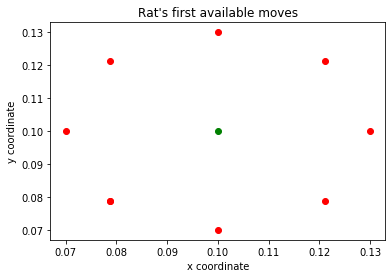

In [160]:
firstMoves = np.array([updatePosition(startingPosition, i) for i in range(0, 9)])
print(firstMoves)

plt.plot(firstMoves[:, 0], firstMoves[:, 1], 'ro')
#plt.axis([0, 1, 0, 1])
plt.plot([0.1], [0.1], 'go')
plt.xlabel('x coordinate')
plt.ylabel('y coordinate')
plt.title('Rat\'s first available moves')
plt.show()